## Neural Network BT5153 Homework

In this individual homework, we are going to use keras to build neural networks. And by completing five **tasks**, we hope you may gain some insights behind the expressive power of neural networks.

### Due on: *21 Feb 2020 @ 23:59 *  

### Submit this .ipynb file to:  *LumiNUS > Files > Individual HW Assignment*

### In addition, please prepend your NUS userID to the filename, i.e., "`a0123456_bt5153_assignment.ipynb`"

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## I. Architectures Encoding Functions

**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

**Problem #1:** For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \in \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \in \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connects the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer
<img src="single_hidden_layer.jpg" style="width: 600px;" align="center"/>

1. **Task 1**: write down the expression form for y=f(x)

In [21]:
# y = f(x), which is the expression of the f

## II. Regression

**Motivating Question:** We saw in Part I that each neural network represents a function that depends on the selection of model architectures sucg as activation function for each node, hidden layer size, the number of layers and etc. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer) or deep-wide?
<img src="activation-functions.png" style="width: 600px;" align="center"/>

**Problem #2:** In the following, we fix a function and approximate it using a polynomial model as well as a neural network. Investigate the effects of the network architecture on the quality of the approximation. Discuss the pro's and con's of using each model.

In [3]:
# set the number of samples to take for each toy dataset
n_samples = 1000
# set the proportion of toy data to hold out for testing
test_size = 0.3
# set the random seed to make the experiment reproducible 
random_seed = 5153
np.random.seed(random_seed)

In [4]:
# define a function
f = lambda x: np.cos(np.sqrt(x))**2
# choose some points from the function - this is our toy dataset 
X = np.random.permutation(np.linspace(0, 50, n_samples))
Y = f(X)
# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

No handles with labels found to put in legend.


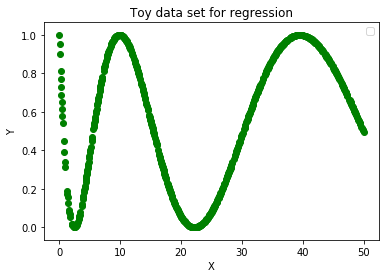

In [5]:
# plot the toy data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, color='green')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy data set for regression')
plt.show()

Let's first fit a polynomial model to the toy data set. ***Here you should experiment with the degree of the polynomial and observe the effects this has on the fit.*** You want to think about issues like computational effeciency and generalizability of this type of modeling.

##### Polynomial model

In [6]:
# degree of the polynomial model - play around with this!
degree = 4
# add polynomial features to the data and fit a ridge regression model
simple_model = make_pipeline(PolynomialFeatures(degree), Ridge())
simple_model.fit(X_train.reshape((X_train.shape[0], 1)), Y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

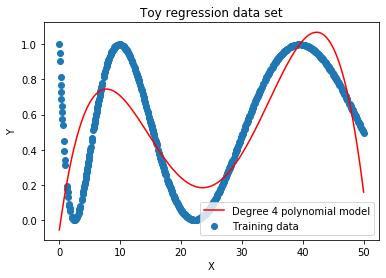

In [7]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500).reshape((500, 1))
y_pred = simple_model.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='Degree ' + str(degree) + ' polynomial model')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [20]:
# evaluate the model
print('Train R2:', simple_model.score(X_test.reshape((X_test.shape[0], 1)), Y_test))
print('Test R2:', r2(Y_test, simple_model.predict(X_test.reshape((X_test.shape[0], 1)))))

Train R2: 0.6790725716473621
Test R2: 0.6790725716473621


Now let's fit a MLP network with a single hidden layer. Start with **sigmoid** or **hyperbolic-tan** activation functions for the hidden nodes and linear activation for the output. 

***Experiment with the number of hidden nodes and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. 

***Experiment with different activation functions and observe the effect of this on the quality of the fit.*** 

2. **Task 2**: Let us start with the configuration that H is 500 and the activation function is tanh

In [9]:
# number of hidden nodes
H = 500
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model = Sequential()
# layer 0
# model.add(...) 

# layer 1
# model.add(...) 

# configure the model
# model.compile(...)

In [10]:
# fit the model
# model.fit(...)

In [ ]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500)
y_pred = model.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='MLP with one hidden layer')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [ ]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Train R2:', r2(Y_test, model.predict(X_test)))

3. **Task 3**: Experiment with the number of hidden nodes and observe the effect of this on the quality of the fit. 

The activation function is fixed to tanh. The grid of hidden nodes number is [10, 50, 100, 150, 300, 500]

In [16]:
# Plot the train/test performace against the number of hidden nodes, H


4. **Task 4**: Experiment with different activation functions and observe the effect of this on the quality of the fit.
The hidden nodes number is fixed to 500. Try the following three different hidden activation functions: [linear, sigmoid, tanh]

In [18]:
# Plot the train/test performace against these three activation functions


Now fix a width $H$ and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with sigmoid or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 


***Experiment with the number of layers and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your polynomial model as well as to the model with a single hidden layer (in terms of quality of fit, efficiency and generalizability).



5. **Task 5**: Build the model that number of hidden nodes is 50. The number of hidden layers is 6. All non-linear activation functions are set to be tanh.

In [17]:
# number of hidden nodes
H = 50
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = Sequential()
# layer 0
# model2.add(...) 

# layer 1
# model2.add(...) 

# layer 2
# model2.add(...) 

# layer 3
# model2.add(...) 

# layer 4
# model2.add(...) 

# layer 5
# model2.add(...) 

# layer 6
# model2.add(...) 

# configure the model
# model2.compile(...)

In [2]:
# fit the model
# model2.fit(...)

In [ ]:
# use our model to predict in the range we want
X_range = np.linspace(0, 50, 500)
y_pred = model2.predict(X_range)

# we plot the model (degree 4 polynomial) against the data
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, color='r', label='MLP with one hidden layer')
ax.legend(loc='best')
ax.set(xlabel='X', ylabel='Y', title='Toy regression data set')
plt.show()

In [ ]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Train R2:', r2(Y_test, model2.predict(X_test)))

What if we wanted to approximate a different function $f$ with MLP's? ***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?